# LeNet CIFAR-10 Classification
* Author: Ziad Tamim
* Description: Training LeNet with CIFAR-10 Dataset. Loading data, building the Lenet achetiture using tensorflow, training the model, and evaluating its performance.

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import datasets, layers, models


2024-04-30 10:31:38.374914: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-30 10:31:38.375003: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-30 10:31:38.540483: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


## Loading Training and testing data (MNIST)
* Loading the data using pandas read_csv function
* Normalising pixle values

In [2]:
# Load CIFAR-10 data
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# No need to resize since the images are already 32x32, but ensure they're float32 type for model training
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


## Building the LeNet architechture using tensorflow

In [3]:
def build_lenet(input_shape=(32, 32, 3)):
    model = models.Sequential([
        # 1st Convolutional Layer
        layers.Conv2D(6, (5, 5), activation='tanh', input_shape=input_shape, padding='same'),
        layers.AveragePooling2D(2),
        
        # 2nd Convolutional Layer
        layers.Conv2D(16, (5, 5), activation='tanh'),
        layers.AveragePooling2D(2),
        
        # Flatten the data for upcoming dense layers
        layers.Flatten(),
        
        # 1st Dense Layer
        layers.Dense(120, activation='tanh'),
        
        # 2nd Dense Layer
        layers.Dense(84, activation='tanh'),
        
        # Output Layer
        layers.Dense(10, activation='softmax')  # 10 classes in CIFAR-10
    ])
    
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Create and compile the LeNet model
model = build_lenet()
model.summary()


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 6)      │           456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 16, 16, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 12, 12, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 6, 6, 16)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 120)            │        69,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 83,126 (324.71 KB)

 Trainable params: 83,126 (324.71 KB)

 Non-trainable params: 0 (0.00 B)

# Training the model
* 40 epochs
* 64 batch size

In [4]:
history = model.fit(x_train, y_train, batch_size=64, epochs=40, validation_data=(x_test, y_test))


Epoch 1/40
 65/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1882 - loss: 2.1834

I0000 00:00:1714473123.506928     103 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1714473123.525215     103 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3312 - loss: 1.8769

W0000 00:00:1714473131.658166     106 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.3312 - loss: 1.8768 - val_accuracy: 0.4143 - val_loss: 1.6501
Epoch 2/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4371 - loss: 1.5925 - val_accuracy: 0.4666 - val_loss: 1.4850
Epoch 3/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4886 - loss: 1.4415 - val_accuracy: 0.5037 - val_loss: 1.4006
Epoch 4/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5263 - loss: 1.3368 - val_accuracy: 0.5147 - val_loss: 1.3745
Epoch 5/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5558 - loss: 1.2665 - val_accuracy: 0.5385 - val_loss: 1.3143
Epoch 6/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5692 - loss: 1.2136 - val_accuracy: 0.5311 - val_loss: 1.3194
Epoch 7/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5899 - loss: 1.1728 - val_accuracy: 0.5410 - val_loss: 1.3092
Epoch 8/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6096 - loss: 1.1128 - val_accuracy: 0.5403 - va

In [5]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc}")


 89/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5323 - loss: 1.9235

W0000 00:00:1714473229.799903     106 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5241 - loss: 1.9785
Test accuracy: 0.5166000127792358


## Visualising Training Accuracy and Loss

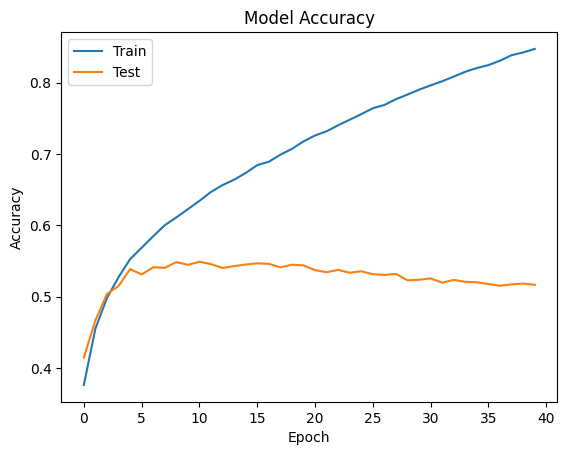

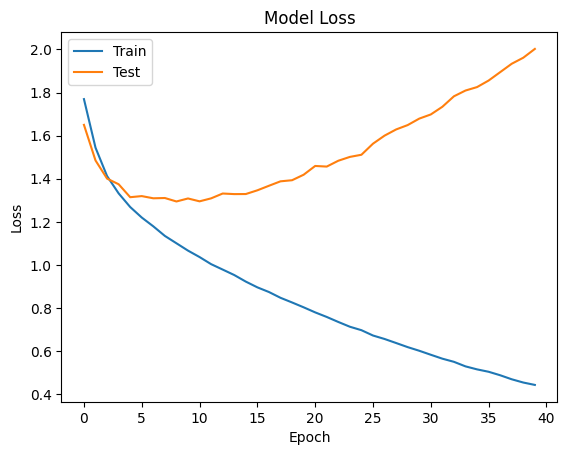

In [6]:
import matplotlib.pyplot as plt
# Plotting the accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plotting the loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


## Evaluaing the model using confusion matrix and classification report

102/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

W0000 00:00:1714473232.220514     104 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


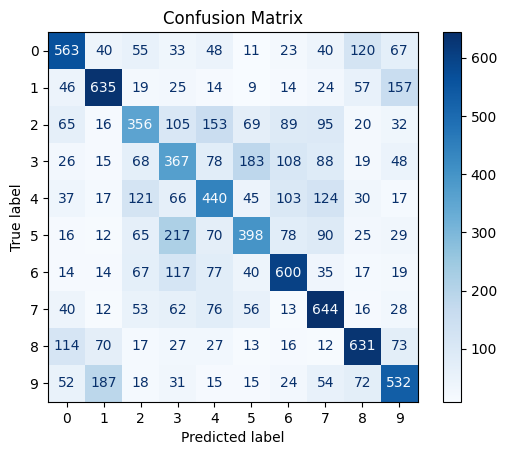

Classification Report:
               precision    recall  f1-score   support

           0     0.5786    0.5630    0.5707      1000
           1     0.6238    0.6350    0.6293      1000
           2     0.4243    0.3560    0.3872      1000
           3     0.3495    0.3670    0.3580      1000
           4     0.4409    0.4400    0.4404      1000
           5     0.4744    0.3980    0.4328      1000
           6     0.5618    0.6000    0.5803      1000
           7     0.5340    0.6440    0.5839      1000
           8     0.6266    0.6310    0.6288      1000
           9     0.5309    0.5320    0.5315      1000

    accuracy                         0.5166     10000
   macro avg     0.5145    0.5166    0.5143     10000
weighted avg     0.5145    0.5166    0.5143     10000



In [7]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
# Predictions for the test set
prediction_scores = model.predict(x_test)
predicted_labels = np.argmax(prediction_scores, axis=1)

# Confusion matrix
cm = confusion_matrix(y_test, predicted_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(10))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Classification report
report = classification_report(y_test, predicted_labels, digits=4)
print('Classification Report:\n', report)


## Predicting an image lable from the test set

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 527ms/step


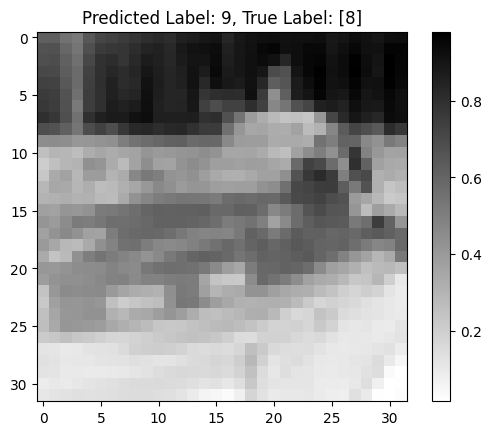

In [8]:
# Inference on a single image
img_index = 2
selected_image = x_test[img_index]
selected_label = y_test[img_index]
image_for_inference = np.expand_dims(selected_image, 0)
predictions = model.predict(image_for_inference)
predicted_label = np.argmax(predictions)

# Display the image
plt.figure()
plt.imshow(selected_image[:, :, 0], cmap=plt.cm.binary)
plt.title(f'Predicted Label: {predicted_label}, True Label: {selected_label}')
plt.colorbar()
plt.grid(False)
plt.show()
